# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [2]:
import tensorflow as tf
import numpy as np

In [24]:
arr = np.arange(9)  # 0 ~ 8까지 9개 데이터 배열

In [25]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체를 생성

dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [26]:
# 각각 원소를 변환 작업을 dataset에 추가 - Dataset.map(변환함수)
dataset = dataset.map(lambda x: x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [27]:
# dataset = dataset.filter(lambda x: x%2 == 0)  # 2의 배수만 걸러내기

In [28]:
dataset = dataset.shuffle(9)  # 데이터를 랜덤하게 n개만 가져다 섞겠다. (여기서 n = 9)

In [22]:
dataset = dataset.batch(4)  # 한번에 지정한 개수(4)만큼 데이터를 제공

In [23]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor([49  9  4  0], shape=(4,), dtype=int64)
tf.Tensor([16 36 64 25], shape=(4,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)


In [29]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [30]:
x = np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [31]:
ds = tf.data.Dataset.from_tensor_slices((x, y))

In [33]:
for a in ds:
    print(a)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=10>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=11>)
(<tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=12>)
(<tf.Tensor: shape=(), dtype=int64, numpy=3>, <tf.Tensor: shape=(), dtype=int64, numpy=13>)
(<tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(), dtype=int64, numpy=14>)
(<tf.Tensor: shape=(), dtype=int64, numpy=5>, <tf.Tensor: shape=(), dtype=int64, numpy=15>)
(<tf.Tensor: shape=(), dtype=int64, numpy=6>, <tf.Tensor: shape=(), dtype=int64, numpy=16>)
(<tf.Tensor: shape=(), dtype=int64, numpy=7>, <tf.Tensor: shape=(), dtype=int64, numpy=17>)
(<tf.Tensor: shape=(), dtype=int64, numpy=8>, <tf.Tensor: shape=(), dtype=int64, numpy=18>)
(<tf.Tensor: shape=(), dtype=int64, numpy=9>, <tf.Tensor: shape=(), dtype=int64, numpy=19>)


In [34]:
ds2 = ds.map(lambda x, y: (x**2, y**3))  # x: 2제곱, y: 3제곱

In [35]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(), dtype=int64, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int64, numpy=9>, <tf.Tensor: shape=(), dtype=int64, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int64, numpy=16>, <tf.Tensor: shape=(), dtype=int64, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int64, numpy=25>, <tf.Tensor: shape=(), dtype=int64, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int64, numpy=36>, <tf.Tensor: shape=(), dtype=int64, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int64, numpy=49>, <tf.Tensor: shape=(), dtype=int64, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int64, numpy=64>, <tf.Tensor: shape=(), dtype=int64, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int64, numpy=81>, <tf.Tensor: shape=(), dtype=int64, numpy=6859>)


In [36]:
ds3 = ds2.shuffle(10)

In [37]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int64, numpy=25>, <tf.Tensor: shape=(), dtype=int64, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int64, numpy=9>, <tf.Tensor: shape=(), dtype=int64, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int64, numpy=16>, <tf.Tensor: shape=(), dtype=int64, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int64, numpy=64>, <tf.Tensor: shape=(), dtype=int64, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(), dtype=int64, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int64, numpy=81>, <tf.Tensor: shape=(), dtype=int64, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int64, numpy=36>, <tf.Tensor: shape=(), dtype=int64, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int64, numpy=49>, <tf.Tensor: shape=(), dtype=int64, numpy=4913>)


In [38]:
ds4 = ds2.batch(4)

In [39]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([5832, 6859])>)


In [40]:
for a in ds4.repeat(3):  # .repeat(n): n번 만큼 반복, n생략 시 무한 반복
    print(a)

(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

In [50]:
ds5 = ds2.batch(4, drop_remainder=True)

In [52]:
for a in ds5:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([2744, 3375, 4096, 4913])>)


In [41]:
dataset = tf.data.Dataset.from_tensor_slices((x, y))\
                         .map(lambda x, y: (x**2, y**3))\
                         .shuffle(10)\
                         .batch(4)\
                         .repeat(3)
# 한번에 작성해본 것

Cause: could not parse the source code:

                         .map(lambda x, y: (x**2, y**3))\
                         .shuffle(10)\
                         .batch(4)\
                         .repeat(3)

This error may be avoided by creating the lambda in a standalone statement.

Cause: could not parse the source code:

                         .map(lambda x, y: (x**2, y**3))\
                         .shuffle(10)\
                         .batch(4)\
                         .repeat(3)

This error may be avoided by creating the lambda in a standalone statement.



In [43]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 1, 81,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1331, 6859, 2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 0, 25, 16, 36])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1000, 3375, 2744, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([64,  4])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([81,  0, 36, 64])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([6859, 1000, 4096, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([16,  4, 49,  1])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([2744, 1728, 4913, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([25,  9])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3375, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([36, 49, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([4096, 4913, 2744, 2197])>)
(<tf.Tensor

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터셋 로딩
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
y_train[:5]  # 회귀(Regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [5]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
# 하이퍼파라미터 값들을 설정
LEARNING_RATE = 0.01  # 학습률
N_EPOCHES = 200  # epoch 횟수, 1 epoch 전체 데이터셋을 한 번 사용한 것
N_BATCHES = 32  # batch_size, 32개 데이터셋마다 파라미터(가중치)를 update

N_TRAIN = X_train.shape[0]  # train set의 개수
N_TEST = X_test.shape[0]  # test set의 개수
N_FEATURES = X_train.shape[1]  # input data의 feature(컬럼) 개수

In [7]:
# Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHES, drop_remainder=True).repeat()  
# 반복시마다 데이터를 주기 위해 repeat()가 필요(여러 epoch를 돌때마다 계속 데이터를 제공하기 위해. repeat가 없으면 1 epoch 후 데이터를 제공하지 못한다.)
# drop_remainder는 batch에서 갯수를 못채우고 남겨진 애들은 버리라는 의미 (마지막에 batch_size보다 제공할 데이터가 적으면 학습 시 제공하지 말고 버려라)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHES)

In [8]:
# Model 생성
def create_model():
    model = keras.Sequential()
    # 입력 Layer를 따로 정의
    # 첫번째 Layer를 만들 때 input_shape(1개의 입력 데이터의 형태)를 지정하면 입력 Layer층이 자동으로 생성된다.
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES, )))
    model.add(keras.layers.Dense(units=8, activation='relu'))
    # 출력 Layer
    model.add(keras.layers.Dense(units=1))  # 회귀의 출력층: units=1, activation은 사용하지 않는다.
    
    # Model compile
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),  # optimizer의 하이퍼파라미터를 기본값으로 쓸 경우, 문자열로 'adam'을 선언하면 됨
                  loss = 'mse')  # 회귀의 Loss 함수: mse
    return model

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 1 step: 한 번 가중치를 업데이트, batch_size
# 1 epoch: 전체 train 데이터를 한 번 학습
steps_per_epoch = N_TRAIN // N_BATCHES  # 학습 데이터 개수 // 배치 수
validation_steps = int(np.ceil(N_TEST / N_BATCHES))

In [12]:
history = model.fit(train_dataset,  # train dataset (X_train, y_train)
                    epochs=N_EPOCHES,
                    steps_per_epoch=steps_per_epoch,  # 1 epoch당 step 수
                    validation_data=val_dataset,  # 검증 Dataset 지정
                    validation_steps=validation_steps
                   )

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 0s 40ms/step - loss: 267.5482 - val_loss: 89.9268
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 104.3041 - val_loss: 92.1591
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 69.2335 - val_loss: 79.4875
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 60.0414 - val_loss: 78.7272
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 54.1168 - val_loss: 99.6899
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 57.2010 - val_loss: 81.1017
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 49.4346 - val_loss: 76.8680
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 48.3889 - val_loss: 69.2279
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 46.7533 - val_loss: 69.9994
Epoch 10/200
12/12 [===========================

Epoch 81/200
12/12 [==============================] - 0s 2ms/step - loss: 29.7877 - val_loss: 42.9405
Epoch 82/200
12/12 [==============================] - 0s 2ms/step - loss: 25.0405 - val_loss: 38.5647
Epoch 83/200
12/12 [==============================] - 0s 2ms/step - loss: 27.5067 - val_loss: 49.7989
Epoch 84/200
12/12 [==============================] - 0s 2ms/step - loss: 29.3596 - val_loss: 46.0778
Epoch 85/200
12/12 [==============================] - 0s 2ms/step - loss: 31.8179 - val_loss: 41.7817
Epoch 86/200
12/12 [==============================] - 0s 2ms/step - loss: 26.1240 - val_loss: 40.7516
Epoch 87/200
12/12 [==============================] - 0s 2ms/step - loss: 24.6231 - val_loss: 38.6702
Epoch 88/200
12/12 [==============================] - 0s 2ms/step - loss: 25.6573 - val_loss: 41.9770
Epoch 89/200
12/12 [==============================] - 0s 2ms/step - loss: 28.8570 - val_loss: 46.8523
Epoch 90/200
12/12 [==============================] - 0s 2ms/step - loss: 26.4077 

12/12 [==============================] - 0s 2ms/step - loss: 14.4003 - val_loss: 60.5423
Epoch 161/200
12/12 [==============================] - 0s 2ms/step - loss: 15.3995 - val_loss: 80.3617
Epoch 162/200
12/12 [==============================] - 0s 2ms/step - loss: 18.0237 - val_loss: 57.1399
Epoch 163/200
12/12 [==============================] - 0s 2ms/step - loss: 20.0912 - val_loss: 67.4427
Epoch 164/200
12/12 [==============================] - 0s 2ms/step - loss: 15.5847 - val_loss: 72.1314
Epoch 165/200
12/12 [==============================] - 0s 2ms/step - loss: 16.3312 - val_loss: 56.7348
Epoch 166/200
12/12 [==============================] - 0s 2ms/step - loss: 14.8061 - val_loss: 81.2350
Epoch 167/200
12/12 [==============================] - 0s 2ms/step - loss: 17.3312 - val_loss: 59.9095
Epoch 168/200
12/12 [==============================] - 0s 2ms/step - loss: 15.8270 - val_loss: 66.0559
Epoch 169/200
12/12 [==============================] - 0s 2ms/step - loss: 15.7369 - va

In [13]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [14]:
history.history

{'loss': [267.54815038045246,
  104.30407969156902,
  69.23347918192546,
  60.04138898849487,
  54.116767724355064,
  57.200984954833984,
  49.43464374542236,
  48.38888661066691,
  46.75333070755005,
  46.66474437713623,
  46.23195584615072,
  42.72865311304728,
  41.34861342112223,
  42.95024315516154,
  45.772807121276855,
  43.3036527633667,
  39.51527444521586,
  38.71933992703756,
  40.44642527898153,
  43.02230882644653,
  50.46841581662496,
  43.46821562449137,
  36.546589056650795,
  37.0623033841451,
  38.751724084218345,
  35.18793137868246,
  37.125555197397865,
  37.17826636632284,
  37.58138100306193,
  37.702343463897705,
  36.24028015136719,
  39.49236639340719,
  34.485824743906655,
  34.142175833384194,
  39.91227380434672,
  34.43192688624064,
  34.50432205200195,
  38.0359431107839,
  31.893465042114258,
  36.362414042154946,
  31.879402319590252,
  38.385223706563316,
  47.74273268381754,
  49.66123024622599,
  47.420417626698814,
  34.38943751653036,
  33.50034888

In [15]:
history.history['val_loss']

[89.92675399780273,
 92.15909004211426,
 79.4875078201294,
 78.72720623016357,
 99.6899356842041,
 81.1017255783081,
 76.86800003051758,
 69.22787761688232,
 69.99941825866699,
 69.80962753295898,
 63.043829917907715,
 67.83728694915771,
 56.7628870010376,
 73.3998966217041,
 63.27941131591797,
 55.989073753356934,
 50.53282690048218,
 49.67723560333252,
 54.63577651977539,
 46.53903341293335,
 50.402194023132324,
 58.64126205444336,
 48.4513955116272,
 63.46757698059082,
 47.89303016662598,
 44.6184515953064,
 48.89816951751709,
 49.15044689178467,
 47.21087598800659,
 50.49917554855347,
 51.17438316345215,
 47.80748462677002,
 45.62557125091553,
 44.08393144607544,
 46.934364795684814,
 45.77972888946533,
 43.34054660797119,
 43.799519538879395,
 44.123969078063965,
 46.49319076538086,
 44.39634418487549,
 55.821560859680176,
 53.421998023986816,
 96.08253288269043,
 52.75479793548584,
 45.12199544906616,
 44.824174880981445,
 55.073750495910645,
 45.01441431045532,
 46.8683319091796

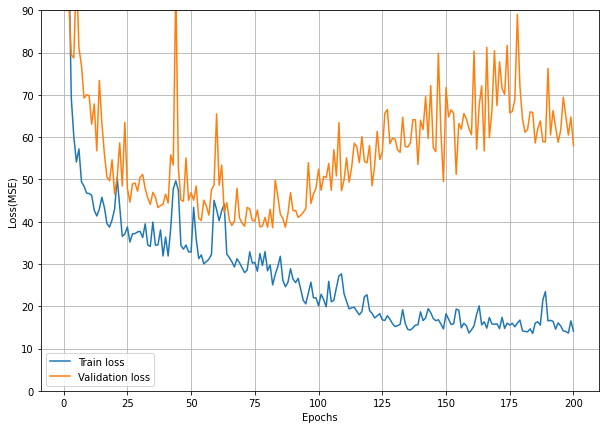

In [16]:
# epoch당 Loss와 val_loss의 변화에 대한 선 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(range(1,N_EPOCHES+1), history.history['loss'], label='Train loss')
plt.plot(range(1,N_EPOCHES+1), history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 90)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# 평가
model.evaluate(val_dataset)

4/4 [==============================] - 0s 2ms/step - loss: 57.9575


57.95748519897461

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [18]:
# 데이터셋 읽기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [20]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [21]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

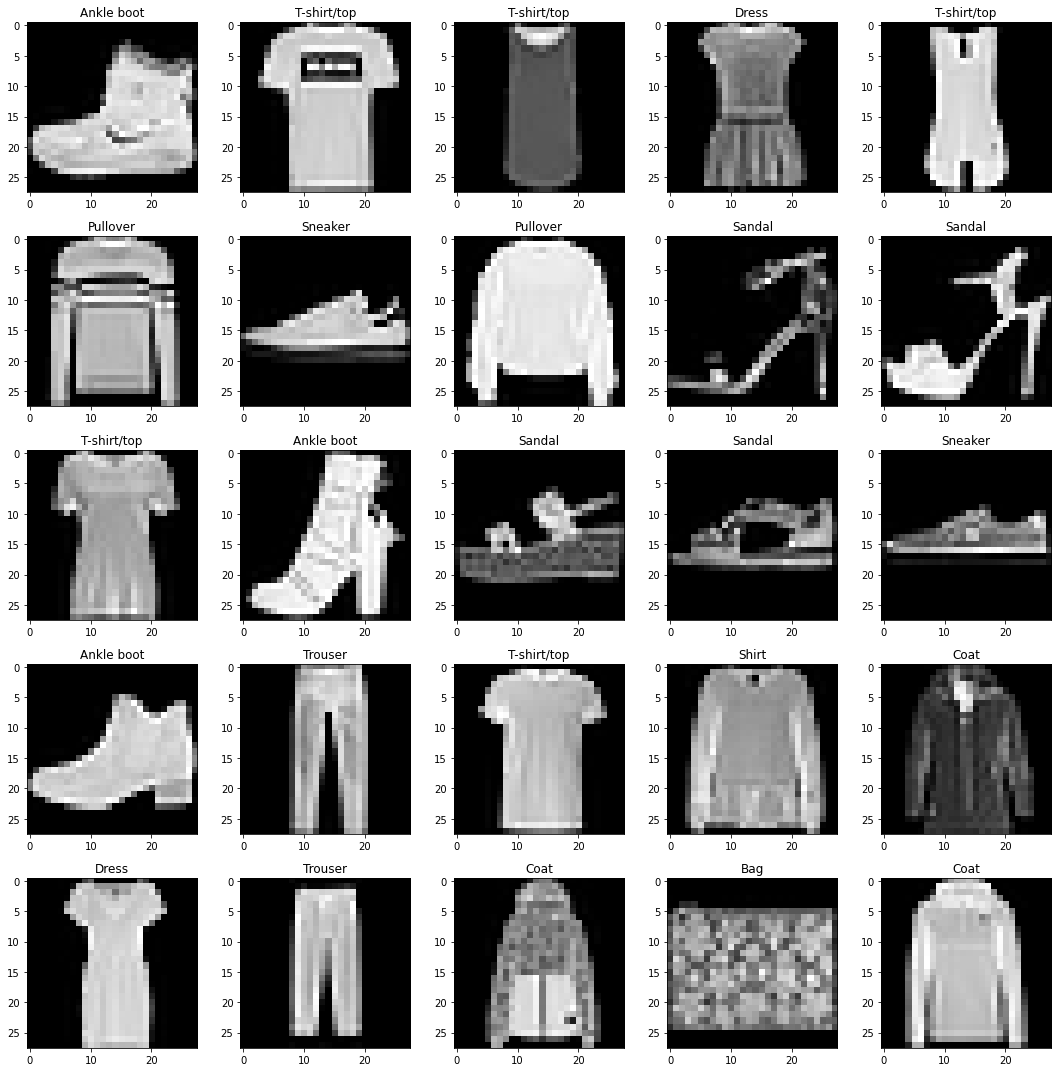

In [22]:
# 이미지 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])

plt.tight_layout()
plt.show()

In [23]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 50
N_BATCHS = 100

N_CLASS = 10  # CLASS CATEGORY 개수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 28

In [24]:
# 데이터 전처리
# X(이미지): 0 ~ 255 -> 0 ~ 1
X_train = X_train/255.
X_test = X_test/255.

# Y(label): 다중분류 - One Hot Encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [25]:
np.max(X_test), np.min(X_test)

(1.0, 0.0)

In [26]:
y_test.shape

(10000, 10)

In [27]:
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)\
                                .repeat()

In [29]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [30]:
# 모델 구현
def create_model():
    model = keras.Sequential()
    
    # 입력층 (Input layer)
    model.add(keras.layers.Input((28, 28)))
    model.add(keras.layers.Flatten())
#     model.add(keras.layers.Flatten(input_shape=(28, 28)))  # 위의 두 줄과 동일한 방법
    
    # 은닉층 (Hidden layer)
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    
    # 출력층 (Output Layer)
    # 다중 분류: units-class category 개수, activation-softmax => 각 class별 확률
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # 컴파일
    # 다중 분류: Loss-categorical_crossentropy(y를 OneHotEncoding한 경우)
    #          sparse-categorical_crossentropy(y를 OneHotEncoding 안 한 경우)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [31]:
model = create_model()

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


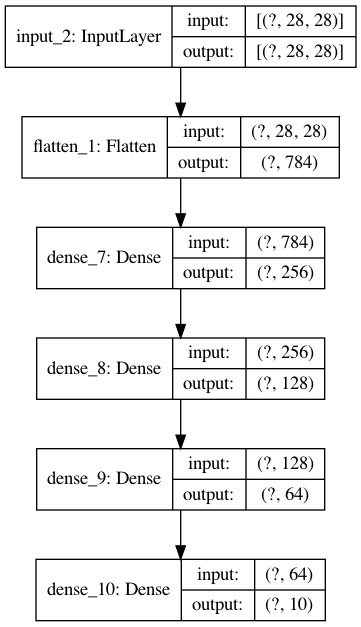

In [60]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='fashion_mnist_model.png', show_shapes=True)

In [33]:
# 학습
# epoch당 steps 수 계산
steps_per_epoch = N_TRAIN // N_BATCHS  # drop_remainder 때문에 자투리를 버리게 됨
validation_steps = int(np.ceil(N_TEST / N_BATCHS))  # val에서는 drop_remainder를 사용하지 않아서, 이런 방법을 사용
print(steps_per_epoch, validation_steps)

600 100


In [34]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps
                   )

Train for 600 steps, validate for 100 steps
Epoch 1/50
600/600 [==============================] - 3s 4ms/step - loss: 0.5262 - accuracy: 0.8147 - val_loss: 0.4183 - val_accuracy: 0.8510
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8655 - val_loss: 0.4054 - val_accuracy: 0.8509
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3300 - accuracy: 0.8793 - val_loss: 0.3708 - val_accuracy: 0.8666
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3072 - accuracy: 0.8861 - val_loss: 0.3626 - val_accuracy: 0.8689
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2870 - accuracy: 0.8941 - val_loss: 0.3545 - val_accuracy: 0.8678
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2748 - accuracy: 0.8962 - val_loss: 0.3338 - val_accuracy: 0.8782
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2583 - accuracy: 0.9033 - va

In [35]:
# 평가 - test set (마지막에 한 번)
model.evaluate(val_dataset)  # [loss, accuracy] - 함수에서 지정해줬으므로

100/100 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.8911


[0.5654418549686671, 0.8911]

In [36]:
# 결과 시각화 (loss와 지정한 평가지표의 epoch당 변화를 시각화) -> line plot
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

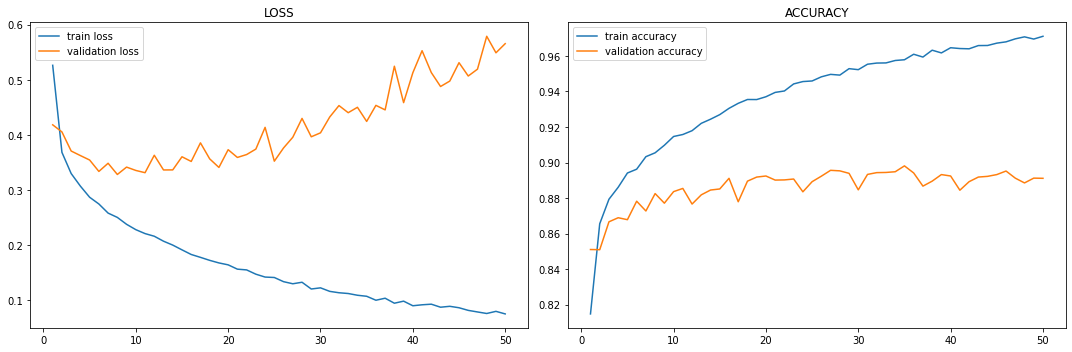

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()

## IMDB 감성분석
### 이진분류 (Binary Classification)
- 영화 댓글: 부정(0), 긍정(1)

In [3]:
import pickle

# 데이터 로드
with open('imdb_dataset/x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('imdb_dataset/x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
    
with open('imdb_dataset/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
    
with open('imdb_dataset/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [4]:
len(X_train)

25000

In [6]:
# X -> 벡터화(숫자 변경)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)
tfidf.fit(X_train + X_test)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
X_train_tfidf.shape, X_test_tfidf.shape

((25000, 10000), (25000, 10000))

In [8]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 10
N_BATCHS = 50

N_TRAIN = X_train_tfidf.shape[0]
N_TEST = X_test_tfidf.shape[0]
N_FEATURE = X_train_tfidf.shape[1]

In [9]:
# Dataset 생성 - y: one hot encoding(X)
# Sparse matrix -> ndarray (toarray()를 통해)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf.toarray(), y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test_tfidf.toarray(), y_test)).batch(N_BATCHS)

In [10]:
def create_model():
    model = keras.Sequential()
    
    # Input Layer
    model.add(keras.layers.Input((N_FEATURE, )))
    
    # Hidden Layer
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    # Output Layer: 이진 분류(units=1, activation='sigmoid': Logistic 함수)
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile: 이진 분류 - activation(sigmoid) => Loss: binary_crossentropy
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy']
                 )
    
    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 5,350,657
Trainable params: 5,350,657
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 학습
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
steps_per_epoch, validation_steps

(500, 500)

In [13]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps
                   )

Train for 500 steps, validate for 500 steps
Epoch 1/10
500/500 [==============================] - 26s 52ms/step - loss: 0.3308 - accuracy: 0.8517 - val_loss: 0.3141 - val_accuracy: 0.8648
Epoch 2/10
500/500 [==============================] - 21s 42ms/step - loss: 0.1421 - accuracy: 0.9456 - val_loss: 0.4190 - val_accuracy: 0.8465
Epoch 3/10
500/500 [==============================] - 21s 43ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.7194 - val_accuracy: 0.8400
Epoch 4/10
500/500 [==============================] - 26s 51ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 1.2178 - val_accuracy: 0.8415
Epoch 5/10
500/500 [==============================] - 23s 47ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.3121 - val_accuracy: 0.8426
Epoch 6/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 1.4092 - val_accuracy: 0.8364
Epoch 7/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0027 - accurac

In [14]:
# 평가
model.evaluate(val_dataset)

500/500 [==============================] - 4s 8ms/step - loss: 1.7527 - accuracy: 0.8429


[1.752724106669426, 0.84288]

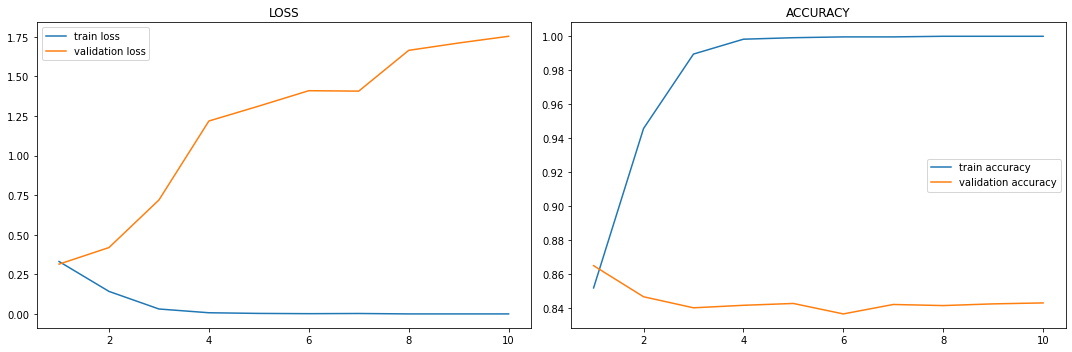

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()